## 2023.1 D1MAT - Exercícios Matemática Aplicada

### Ridley Gadelha de Sousa - CP3021921


Importando as bibliotecas necessárias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as smp

np.random.seed(42)

### Questão 1 - Gerando um conjunto os valores de entrada e saída $x_i$ e $y_i$

In [2]:
x_data = np.linspace(0, 50, 100)
y_data = 5*(np.sin(x_data) + 1) + 2 * x_data + np.random.rand(100) * 5

Visualizando os dados

Text(0, 0.5, 'Y')

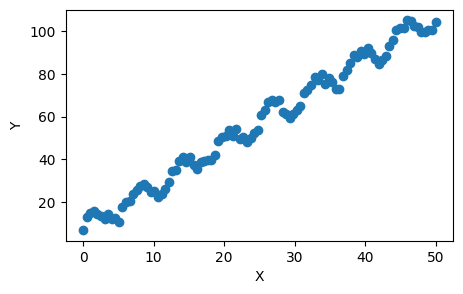

In [26]:
plt.figure(figsize=(5,3))
plt.scatter(x_data,y_data)
plt.xlabel('X')
plt.ylabel('Y')

Gerando 10 valores aleatórios de $\theta$ entre 0 e 5

In [19]:
n_theta = 10
np.random.seed(42)
theta_arr = 5 * np.random.rand(n_theta)
theta_arr.sort()
print(theta_arr)

[0.29041806 0.7799726  0.7800932  1.87270059 2.99329242 3.00557506
 3.54036289 3.65996971 4.33088073 4.75357153]


In [20]:
def perda_absoluta(x, theta, y):
    err = y - theta * x
    N = len(x)
    loss = np.sum(np.abs(err))

    return loss/N

def perda_quadratica(x, theta, y):
    err = y - theta * x
    N = len(x)
    loss = np.sum(np.power(err, 2.0))

    return loss/N

Calculando e visualizando a função de perda absoluta para os valores de $\theta$ e o conjunto de dados utilizado

Text(0, 0.5, '$L(\\theta)$')

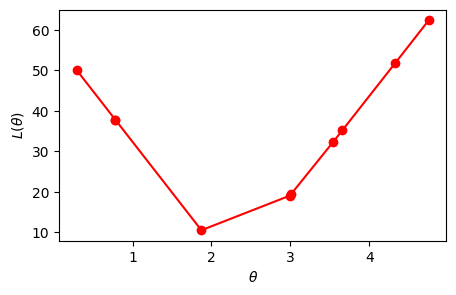

In [21]:
loss_abs = [perda_absoluta(x_data, theta, y_data) for theta in theta_arr]

plt.figure(figsize=(5,3))
plt.plot(theta_arr, loss_abs, 'ro-')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta)$')

Utilizando gradiente descendente para calcular o valor de $\theta$ que minimiza a perda absoluta.

---



Text(0, 0.5, '$L(\\theta)$')

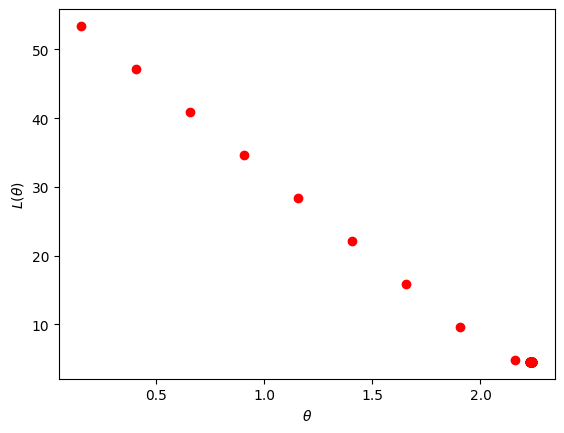

In [13]:
x, y, t = smp.symbols('x y t')
err_abs_pos = y - t * x
err_abs_neg = t * x - y
grad_pos = smp.diff(err_abs_pos, t)
grad_neg = smp.diff(err_abs_neg, t)

theta = theta_arr[0]
iter = 100
lr = 0.01
theta_val = []
loss_val = []
n_samples = len(x_data)

for i in np.arange(iter):
    errors = y_data - theta * x_data
    theta_val.append(theta)
    loss_val.append(np.sum(np.abs(errors))/n_samples)
    
    dL = 0.0
    for index, err in enumerate(errors):
        if err >= 0:
            grad_val = grad_pos.evalf(subs={x:x_data[index], y:y_data[index], t:theta})
        else:
            grad_val = grad_neg.evalf(subs={x:x_data[index], y:y_data[index], t:theta})
            
        dL = dL + grad_val

    theta = theta - lr * (dL / n_samples)

plt.plot(theta_val, loss_val, 'ro')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta)$')

In [24]:
arg_min_loss = np.argmin(loss_val)
theta_min_loss_abs = theta_val[arg_min_loss]
print(f"O valor de theta que minimiza a função de custo absoluta é {theta_min_loss_abs:.4f}")

O valor de theta que minimiza a função de custo absoluta é 2.2328


Utilizando gradiente descendente para calcular o valor de $\theta$ que minimiza a perda quadrática.

Text(0, 0.5, '$L(\\theta)$')

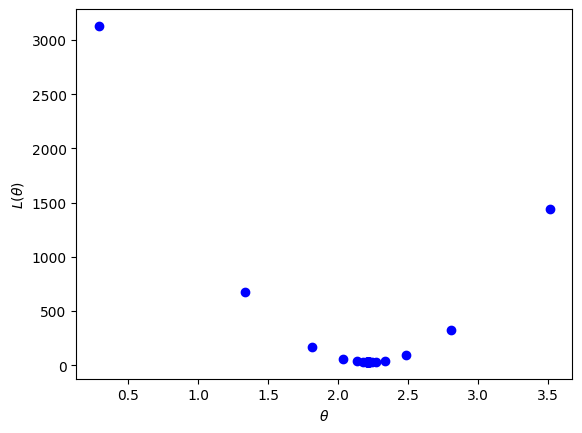

In [23]:
x, y, t = smp.symbols('x y t')
err_quad = (y - t * x)**2
grad_err = smp.diff(err_quad, t)

theta = theta_arr[0]
iter = 100
lr = 0.001
theta_quad_val = []
loss_quad_val = []
n_samples = len(x_data)

for i in np.arange(iter):
    error = perda_quadratica(x_data, theta, y_data)
    theta_quad_val.append(theta)
    loss_quad_val.append(error)
    
    dL = 0.0
    for index in np.arange(n_samples):
        grad_val = grad_err.evalf(subs={x:x_data[index], y:y_data[index], t:theta})  
        dL = dL + grad_val

    theta = theta - lr * (dL / n_samples)

plt.plot(theta_quad_val, loss_quad_val, 'bo')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$L(\theta)$')

In [25]:
arg_min_loss = np.argmin(loss_quad_val)
theta_min_loss_quad = theta_quad_val[arg_min_loss]
print(f"O valor de theta que minimiza a função de custo quadratica é {theta_min_loss_quad:.4f}")

O valor de theta que minimiza a função de custo quadratica é 2.2139


Comparando ambos os valores de $\theta$ encontrados, percebemos que as funções de erro são minimizadas para valores bem próximos. Ou seja, o algoritmo do gradiente descendente converge para ambos os casos.


Questão 2 - Gerando um conjunto os valores de entrada e saída  $x_i$  e  $y_i$